# Predict Future Ride Fare Amounts using Regression
**Objective:** Data Preprocessing and Exploration
.
---

## **Phase 1 — Data Loading & Exploration (EDA)**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [11]:
!pip install geopy



   ---------------------------------------- 0/2 [geographiclib]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   ---------------------------------------- 2/2 [geopy]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', 200)
plt.style.use('seaborn-v0_8')

# Load dataset
df = pd.read_csv("uber.csv")
print("✅ Dataset Loaded!")
print("Shape:", df.shape)
df.head()

✅ Dataset Loaded!
Shape: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Basic info
print(df.info())

# Check missing values
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])

# Check data statistics
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None

Missing Values:
dropoff_longitude    1
dropoff_latitude     1
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,NaN,NaN,NaN,27712503.68235,16013822.212829,1.0,13825346.25,27745495.0,41555300.75,55423567.0
key,200000,200000,2015-05-07 19:52:06.0000003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,200000.0,NaN,NaN,NaN,11.359955,9.901776,-52.0,6.0,8.5,12.5,499.0
pickup_datetime,200000,196629,2009-02-12 12:46:00 UTC,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,200000.0,NaN,NaN,NaN,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,NaN,NaN,NaN,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,NaN,NaN,NaN,-72.525292,13.117408,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,NaN,NaN,NaN,39.92389,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,NaN,NaN,NaN,1.684535,1.385997,0.0,1.0,1.0,2.0,208.0


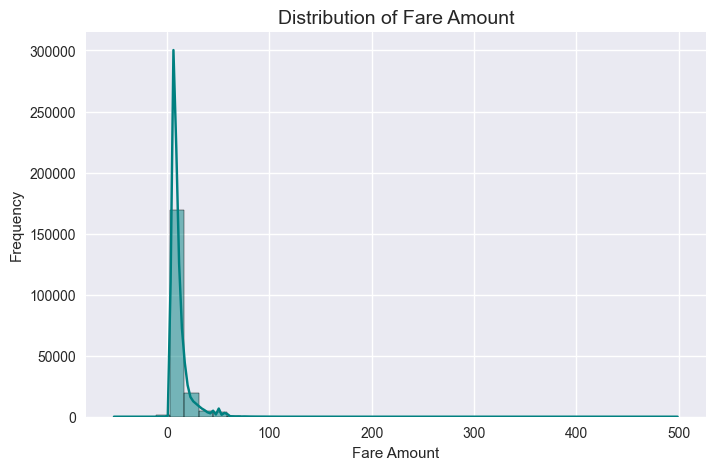

In [7]:
# Target variable distribution - Fare Amount
plt.figure(figsize=(8,5))
sns.histplot(df['fare_amount'].dropna(), kde=True, bins=40, color="teal")
plt.title("Distribution of Fare Amount", fontsize=14)
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **Phase 2 — Handle Missing Data**

In [8]:
# Check percentage of missing values
missing_percent = df.isnull().mean() * 100
print("\nMissing Data Percentage:\n", missing_percent)

# Drop columns with more than 40% missing values
threshold = 40
drop_cols = missing_percent[missing_percent > threshold].index
df.drop(columns=drop_cols, inplace=True)

# Fill missing numeric columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Recheck missing values
print("\nRemaining Missing Values:")
print(df.isnull().sum())


Missing Data Percentage:
 Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


C:\Users\This PC\AppData\Local\Temp\ipykernel_8928\2304807728.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\This PC\AppData\Local\Temp\ipykernel_8928\2304807728.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Remaining Missing Values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


C:\Users\This PC\AppData\Local\Temp\ipykernel_8928\2304807728.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## **Phase 3 —  Feature Engineering**

In [14]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# ================================
# Load Dataset
# ================================
df = pd.read_csv("uber.csv")
print("Initial Shape:", df.shape)

# ======================================================
# 1. Datetime Feature Engineering
# ======================================================
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

    # Extract useful datetime features
    df['Year'] = df['pickup_datetime'].dt.year
    df['Month'] = df['pickup_datetime'].dt.month
    df['Day'] = df['pickup_datetime'].dt.day
    df['Hour'] = df['pickup_datetime'].dt.hour
    df['Weekday'] = df['pickup_datetime'].dt.weekday  # Monday=0, Sunday=6

    # Time-of-day buckets
    def get_time_of_day(hour):
        if pd.isnull(hour):
            return "Unknown"
        elif 5 <= hour < 12:
            return "Morning"
        elif 12 <= hour < 17:
            return "Afternoon"
        elif 17 <= hour < 21:
            return "Evening"
        else:
            return "Night"

    df['Time_of_Day'] = df['Hour'].apply(get_time_of_day)

    # Drop original datetime column
    df.drop(columns=['pickup_datetime'], inplace=True)

# ======================================================
# 2. Calculate Trip Distance (Safe Calculation)
# ======================================================
required_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
if all(col in df.columns for col in required_cols):
    def calculate_distance(row):
        try:
            # Validate coordinates first
            if (
                -90 <= row['pickup_latitude'] <= 90 and
                -180 <= row['pickup_longitude'] <= 180 and
                -90 <= row['dropoff_latitude'] <= 90 and
                -180 <= row['dropoff_longitude'] <= 180
            ):
                start = (row['pickup_latitude'], row['pickup_longitude'])
                end = (row['dropoff_latitude'], row['dropoff_longitude'])
                return geodesic(start, end).km
            else:
                return np.nan
        except:
            return np.nan

    # Apply safely
    df['Distance_KM'] = df.apply(calculate_distance, axis=1)

    # Distance categories
    def categorize_distance(km):
        if pd.isnull(km):
            return 'Unknown'
        elif km <= 2:
            return 'Short'
        elif 2 < km <= 6:
            return 'Medium'
        else:
            return 'Long'
    
    df['Distance_Category'] = df['Distance_KM'].apply(categorize_distance)

# ======================================================
# 3. Handle Categorical Variables (Safe Encoding)
# ======================================================
categorical_cols = df.select_dtypes(include=['object']).columns

# Drop columns with very high cardinality (IDs, booking numbers, etc.)
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() > 100]
df.drop(columns=high_cardinality_cols, inplace=True)

# Encode remaining categorical variables
remaining_categorical_cols = df.select_dtypes(include=['object']).columns
if len(remaining_categorical_cols) > 0:
    df = pd.get_dummies(df, columns=remaining_categorical_cols, drop_first=True)

# ======================================================
# Final Info
# ======================================================
print("\n[INFO] Shape After Feature Engineering:", df.shape)
print("[INFO] Columns After Feature Engineering:\n", df.columns)


Initial Shape: (200000, 9)

[INFO] Shape After Feature Engineering: (200000, 19)
[INFO] Columns After Feature Engineering:
 Index(['Unnamed: 0', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Day', 'Hour', 'Weekday', 'Distance_KM', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Distance_Category_Medium',
       'Distance_Category_Short', 'Distance_Category_Unknown'],
      dtype='object')


## **Phase 4 —  Split the Dataset**

In [15]:
from sklearn.model_selection import train_test_split

# Target variable (assuming Booking Value or Fare Amount)
y = df['Booking Value'] if 'Booking Value' in df.columns else df.iloc[:, -1]
X = df.drop(columns=['Booking Value']) if 'Booking Value' in df.columns else df.iloc[:, :-1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (160000, 18)
Testing Set: (40000, 18)


## **Phase 5 —  Data Scaling/Normalization**

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check scaled data summary
print("Before Scaling (Training Data):\n")
print(X_train.describe().round(2))

print("\nAfter Scaling (Training Data):\n")
print(X_train_scaled.describe().round(2))

Before Scaling (Training Data):

        Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
count    160000.00    160000.00         160000.00        160000.00   
mean   27712332.80        11.35            -72.53            39.94   
std    16032178.16         9.80             11.56             8.09   
min           1.00       -52.00          -1340.65           -74.02   
25%    13793257.25         6.00            -73.99            40.73   
50%    27756078.00         8.50            -73.98            40.75   
75%    41558451.75        12.50            -73.97            40.77   
max    55423567.00       350.00             57.42          1644.42   

       dropoff_longitude  dropoff_latitude  passenger_count       Year  \
count          159999.00         159999.00        160000.00  160000.00   
mean              -72.53             39.92             1.68    2011.74   
std                13.61              6.88             1.41       1.85   
min             -3356.67           -881.

## **Phase 6 —  Correlation Analysis**


Top Features Correlated with Booking Value:

Booking Value               1.000000
pickup_latitude             0.350549
Weekday                     0.002641
Time_of_Day_Night           0.002106
fare_amount                 0.001508
Month                       0.001428
Time_of_Day_Morning        -0.000925
Year                       -0.001029
Unnamed: 0                 -0.001953
passenger_count            -0.002165
Time_of_Day_Evening        -0.002455
Day                        -0.002545
Hour                       -0.004471
Distance_Category_Medium   -0.006441
Distance_Category_Short    -0.007454
dropoff_latitude           -0.010090
dropoff_longitude          -0.126633
pickup_longitude           -0.305841
Distance_KM                      NaN
Name: Booking Value, dtype: float64


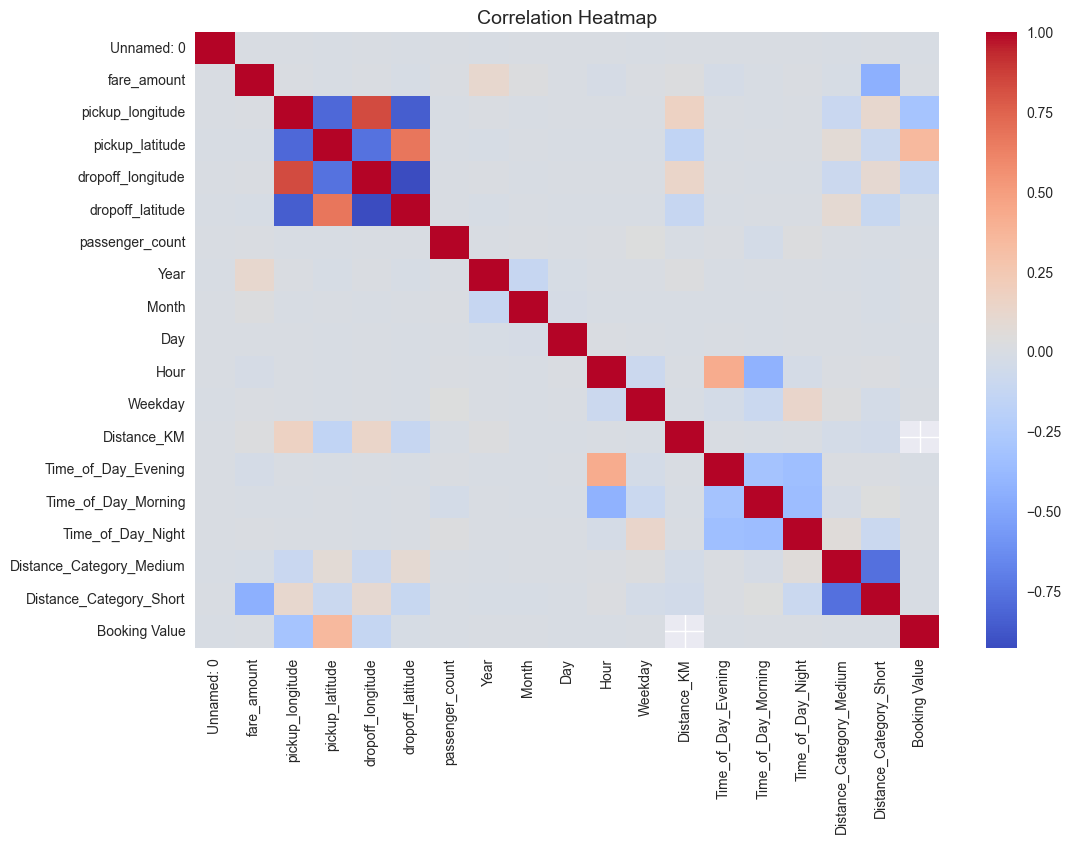

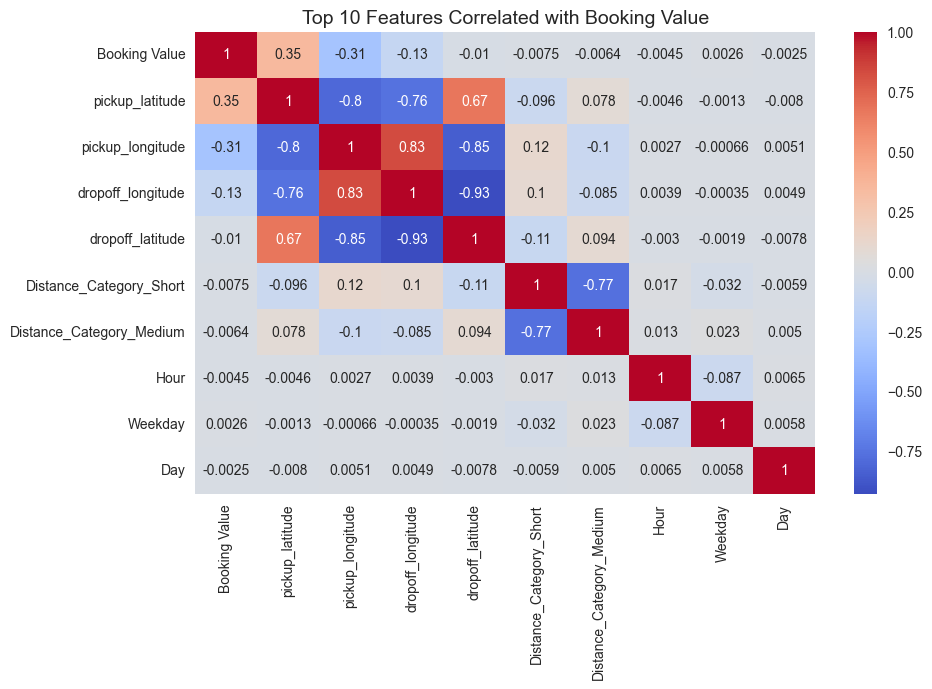

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure X_train_scaled is converted back into DataFrame with correct column names
df_corr = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Match y_train size to X_train size to avoid mismatch errors
y_train_matched = y_train.iloc[:len(df_corr)]

# Add target column for correlation
df_corr["Booking Value"] = y_train_matched.values

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Display top correlated features with Booking Value
print("\nTop Features Correlated with Booking Value:\n")
print(corr_matrix["Booking Value"].sort_values(ascending=False))

# -----------------------------
# FULL CORRELATION HEATMAP
# -----------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# -----------------------------
# TOP 10 FEATURES HEATMAP
# -----------------------------
top_corr_features = corr_matrix["Booking Value"].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr[top_corr_features].corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Top 10 Features Correlated with Booking Value", fontsize=14)
plt.show()

In [19]:
import pandas as pd
# ==========================================================
# Save the Processed Uber Dataset into a CSV File
# ==========================================================

# Define the filename for the processed dataset
processed_file = "uber_processed_data.csv"

# Save the DataFrame to CSV
df.to_csv(processed_file, index=False)

print(f"[INFO] Processed dataset successfully saved as: {processed_file}")

# Optional: Show where the file is saved (absolute path)
import os
print("[INFO] File Path:", os.path.abspath(processed_file))



[INFO] Processed dataset successfully saved as: uber_processed_data.csv
[INFO] File Path: C:\Users\This PC\ uber internship\db\uber_processed_data.csv
